In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Summary statistics

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# to check correlation

In [8]:
dfcor=df.corr()
dfcor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


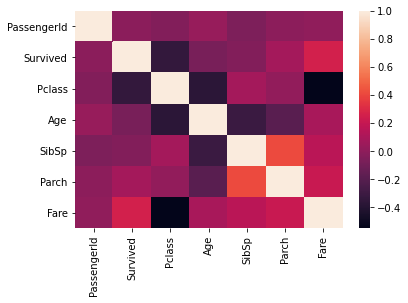

In [9]:
sns.heatmap(dfcor)

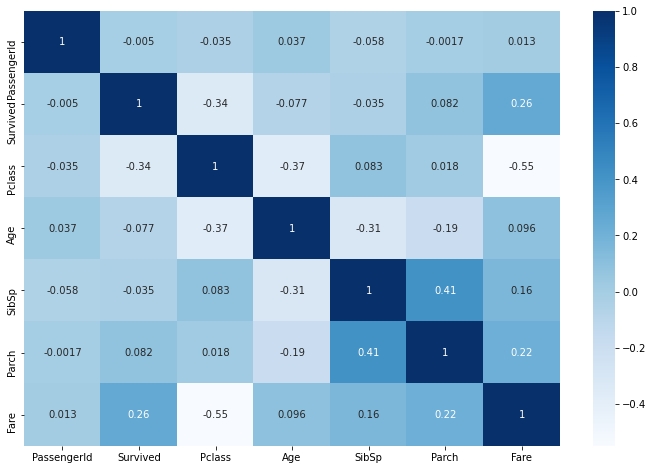

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='Blues',annot=True)

# EDA process

In [11]:
df.Survived.unique()

array([0, 1], dtype=int64)

In [12]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# data visualization

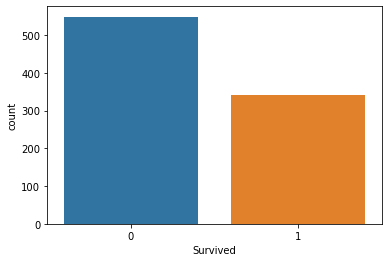

In [14]:
sns.countplot(df['Survived'])

In [15]:
#Look at survival rate by sex and class
df.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


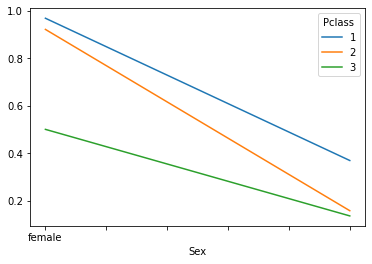

In [16]:
df.pivot_table('Survived',index='Sex',columns='Pclass').plot()

In [17]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

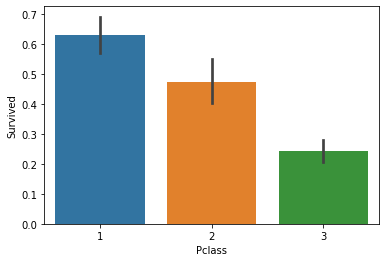

In [18]:
#using barplot to check the survival rate in class,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked

sns.barplot(x='Pclass',y='Survived',data=df)

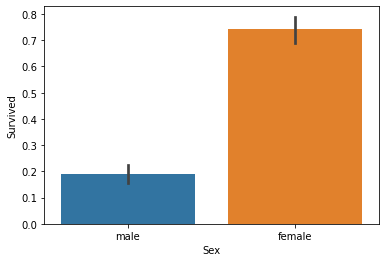

In [19]:
sns.barplot(x='Sex',y='Survived',data=df)

<Figure size 864x576 with 0 Axes>

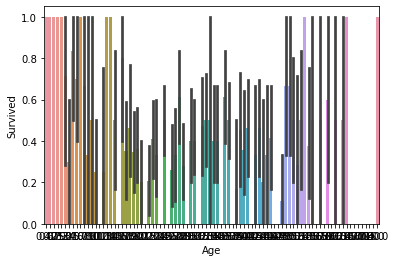

<Figure size 864x576 with 0 Axes>

In [20]:
sns.barplot(x='Age',y='Survived',data=df)
plt.figure(figsize=(12,8))


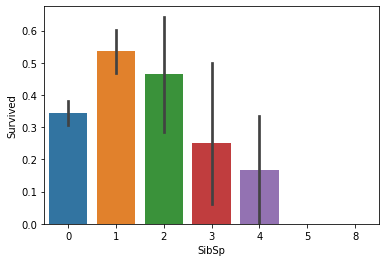

In [21]:
sns.barplot(x='SibSp',y='Survived',data=df)


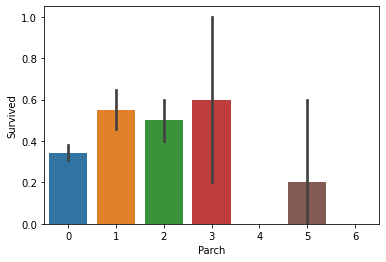

In [22]:
sns.barplot(x='Parch',y='Survived',data=df)


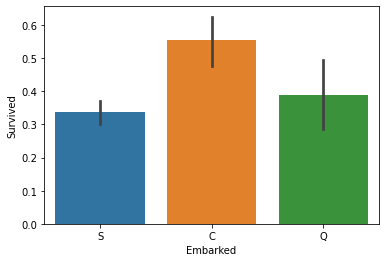

In [23]:
sns.barplot(x='Embarked',y='Survived',data=df)


# checking distribution of skewness

In [24]:
import seaborn as sns
import numpy as ny
import matplotlib.pyplot as plt

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

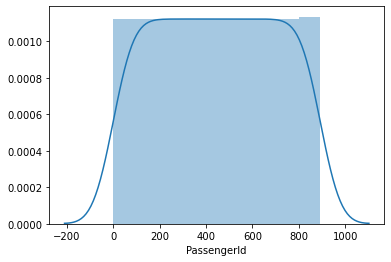

In [26]:
sns.distplot(df['PassengerId'])
plt.show()

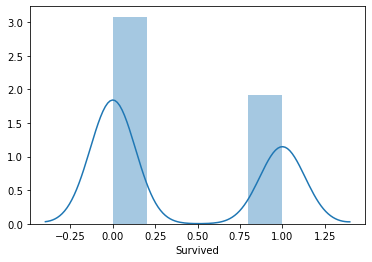

In [27]:
sns.distplot(df['Survived'])
plt.show()

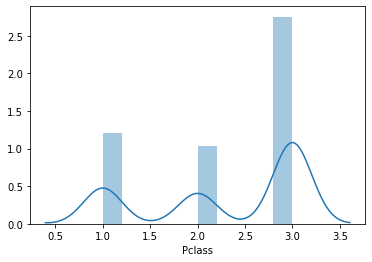

In [28]:
sns.distplot(df['Pclass'])
plt.show()

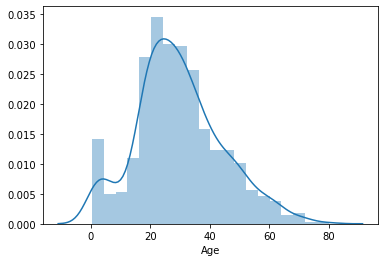

In [29]:
sns.distplot(df['Age'])
plt.show()

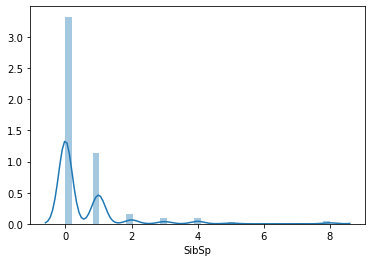

In [30]:
sns.distplot(df['SibSp'])
plt.show()

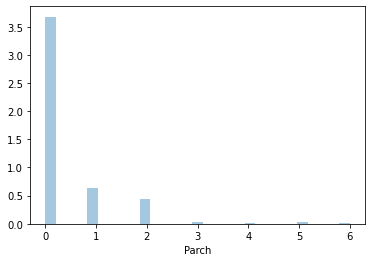

In [31]:
sns.distplot(df['Parch'])
plt.show()

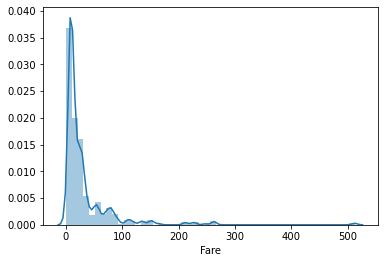

In [32]:
sns.distplot(df['Fare'])
plt.show()

In [33]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

# checking outliers

In [34]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

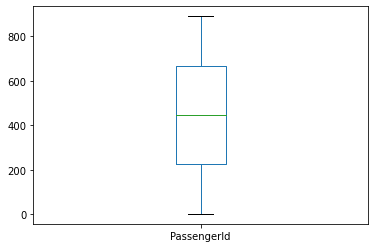

In [35]:
df['PassengerId'].plot.box()

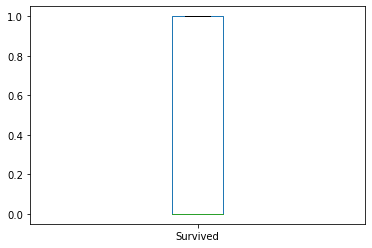

In [36]:
df['Survived'].plot.box()

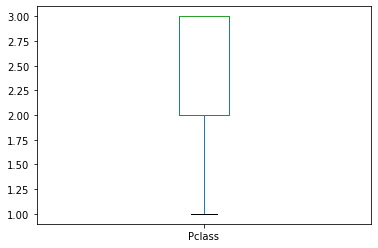

In [37]:
df['Pclass'].plot.box()

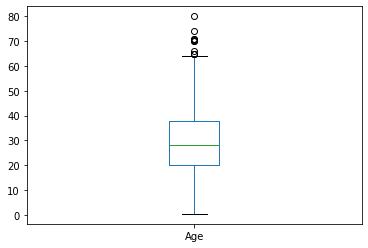

In [38]:
df['Age'].plot.box()

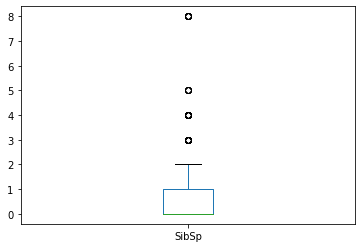

In [39]:
df['SibSp'].plot.box()

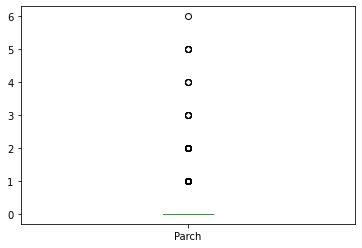

In [40]:
df['Parch'].plot.box()

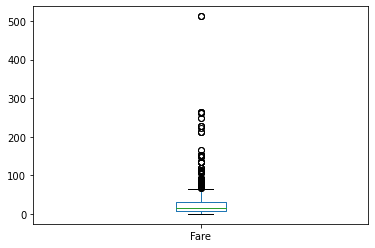

In [41]:
df['Fare'].plot.box()

# removing the null values

In [42]:
#counting the empty value in each columns
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

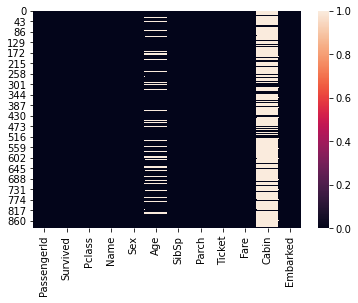

In [43]:
sns.heatmap(df.isnull())

In [44]:
df.drop(columns='Age',inplace=True)

In [45]:
df.drop(columns='Cabin',inplace=True)

In [46]:
df.drop(columns='Embarked',inplace=True)

In [47]:
df.drop(columns='Name',inplace=True)

In [48]:
df.shape

(891, 8)

In [49]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,male,1,0,A/5 21171,7.2500
1,2,1,1,female,1,0,PC 17599,71.2833
2,3,1,3,female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,female,1,0,113803,53.1000
4,5,0,3,male,0,0,373450,8.0500


In [50]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
dtype: object

In [51]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#encoding the sex column
df.iloc[:,3] = labelencoder.fit_transform(df.iloc[:,3].values)

#encoding the ticket column
df.iloc[:,6] = labelencoder.fit_transform(df.iloc[:,6].values)

In [52]:
#checking the values in the column sex and ticket
print(df['Sex'].unique())
print(df['Ticket'].unique())

[1 0]
[523 596 669  49 472 275  85 395 344 132 616  38 535 333 413 153 480 151
 301 184 139 152 278  42 329 179  95 283 362 598 586 288 549 600  43 202
 514 302 186 507  53 391 634 282 617 462  76 190 377 249 522 587 239  29
  94 555 215 561 566 197  32 457 337 601 189 553 623 248 270 557 621 204
  80 347 355 473 158 432 304 311 280  25 637 247 676 652 297 298 341 678
 548 428 475 607 612 117 150 384 361 417 505 245 354 296 254 388 469   2
 193 274 491 176 666 460 585 540 219 463 541 196 318 380 640 537 111 552
 630  55 504 592 203 332 668 438 118 558 405 113 147 622  36 516 538 573
 595 418 654 258 568 470 559 323 265 423  28 576   5 659  90 412 488 593
 169 574 629 114 271  34 459  11 435 386 122 227 406 604 452 494 461 160
 306 242 177 530 316 216 445  17 642 570 526 163 443 416 670 142  63 679
 653 105 102 375  93 615 672 525 125 322 128 554 677 198 556 231 636 444
 674 658 213  92 325 166  54 144 422  31 536 458 185 589   0 608 115 482
   1  16 478 546 334 588 613  47 162 594 465 

In [53]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
dtype: object

# Removing outliers

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.47367361, 0.91896631,
        0.50244517],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.47367361, 1.28262456,
        0.78684529],
       [1.72233219, 1.2669898 , 0.82737724, ..., 0.47367361, 1.64628282,
        0.48885426],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 2.00893337, 1.67617254,
        0.17626324],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.47367361, 1.64656796,
        0.04438104],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.47367361, 0.63501397,
        0.49237783]])

In [55]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88, 118, 119, 159,
       164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278, 299, 311,
       324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 527, 541, 542,
       557, 567, 610, 638, 678, 679, 683, 686, 689, 700, 716, 730, 736,
       737, 742, 774, 779, 787, 792, 813, 824, 846, 850, 858, 863, 885],
      dtype=int64), array([5, 4, 5, 7, 4, 4, 4, 4, 5, 7, 7, 4, 4, 4, 5, 4, 4, 4, 4, 4, 7, 4,
       4, 4, 7, 7, 4, 7, 5, 7, 7, 4, 5, 5, 7, 4, 7, 4, 4, 7, 5, 5, 5, 5,
       7, 4, 4, 7, 7, 7, 7, 5, 7, 7, 5, 7, 4, 4, 4, 4, 4, 4, 5, 4, 5],
      dtype=int64))


In [56]:
z[13][6]

0.02754148130217232

In [57]:
z[40][4]

0.4327933656785018

In [58]:
df_new=df[(z<3).all(axis=1)]

In [59]:
df_new

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,1,1,0,523,7.2500
1,2,1,1,0,1,0,596,71.2833
2,3,1,3,0,0,0,669,7.9250
3,4,1,1,0,1,0,49,53.1000
4,5,0,3,1,0,0,472,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,0,0,101,13.0000
887,888,1,1,0,0,0,14,30.0000
888,889,0,3,0,1,2,675,23.4500
889,890,1,1,1,0,0,8,30.0000


In [60]:
df.shape

(891, 8)

In [61]:
df_new.shape

(827, 8)

In [62]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

# scaling the data

In [63]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled=sc.fit_transform(x)


In [64]:
#finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"best accuracy {accu*100}found on random_state {best_rstate}")
    




best accuracy 63.81667783950377found on random_state 92


In [69]:
#spliting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=92)

# finding the best model

In [72]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"accuracy={r2score*100}, Cross_val_score = {cvscore*100} $ difference = {(r2score*100)-(cvscore*100)}")

accuracy=56.54428293859445, Cross_val_score = 53.845305242842926 $ difference = 2.6989776957515232


In [73]:
#randomo forestregressor
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print(f"accuracy={r2score*100}, Cross_val_score = {cvscore*100} $ difference = {(r2score*100)-(cvscore*100)}")


accuracy=77.32605956171841, Cross_val_score = 70.84706613604459 $ difference = 6.478993425673821


In [74]:
#adaBoostRegessor
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
ADB.fit(x_train,y_train)
y_pred=ADB.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print(f"accuracy={r2score*100}, Cross_val_score = {cvscore*100} $ difference = {(r2score*100)-(cvscore*100)}")


accuracy=74.53722383930759, Cross_val_score = 63.00237633272955 $ difference = 11.53484750657804


In [75]:
#SGDRegressor
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()
print(f"accuracy={r2score*100}, Cross_val_score = {cvscore*100} $ difference = {(r2score*100)-(cvscore*100)}")



accuracy=-5.828592708715586e+26, Cross_val_score = -4.619199825370597e+26 $ difference = -1.209392883344989e+26


# hyperparameter tuning

In [84]:
#crearting parameter list to pass Gridsearchcv
parameters = {'max_iter': [500,700,900,1100,1300,1500],
              'alpha': [0.0001,0.001,0.01,1,10,100],
              'penalty':['elasticnet','l1','l2']}

In [85]:
from sklearn.model_selection import GridSearchCV

GCV=GridSearchCV(SGDRegressor(),parameters,cv=5,scoring='r2')
GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)
print('Final accuracy:',r2_score(y_test,GCV_pred)*100)


Final accuracy: -9.720485188015811e+27
